<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/Deep_Learning/4_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [31]:
np.random.random((5,2))

array([[0.86253948, 0.29985532],
       [0.667436  , 0.50203373],
       [0.01459954, 0.12563356],
       [0.63004862, 0.95140349],
       [0.46102434, 0.71957845]])

In [32]:
#We will be using synthetic data for this notebook
#Make the dataset 
N=1000
X = np.random.random((N,2)) * 6 - 3   #uniformly distributed data between (-3,+3)
X

array([[ 0.83561057, -0.82402934],
       [-1.18170224, -2.33366305],
       [ 1.4578894 , -1.92889978],
       ...,
       [-0.20209071, -1.91509426],
       [-2.67526874,  1.20191755],
       [-0.22206531,  2.93686406]])

In [33]:
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


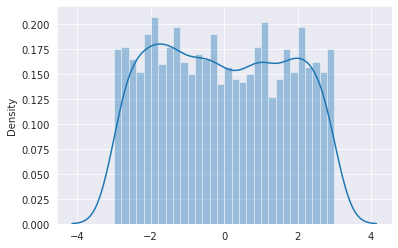

In [34]:
sns.distplot(X.flatten(), bins=30)
plt.show()

In [35]:
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])
Y[:6]

array([-0.88438529,  0.04106543, -0.09535035,  0.00259632, -1.0707783 ,
        1.44943069])

This implements the function:
y = cos(2x1) + cos(3x2)

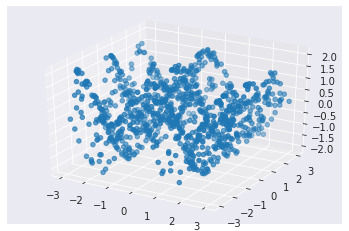

In [36]:
#Plot it on a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [37]:
#Build the model
#Data is NxD form, where N=1000, D=2

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
                                    tf.keras.layers.Dense(1)
])

In [38]:
#Compile and fit
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse')

In [39]:
r = model.fit(X,Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9994
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9384
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9076
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8970
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8419
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7914
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7258
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6988
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6244
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5601
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5645
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5462
Epoch 13/100
32/32 [=================

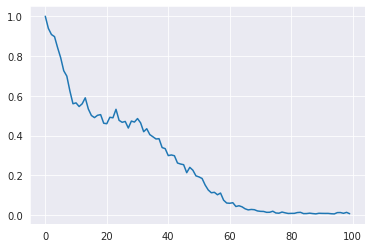

In [40]:
plt.plot(r.history['loss'], label='Loss')
plt.show()

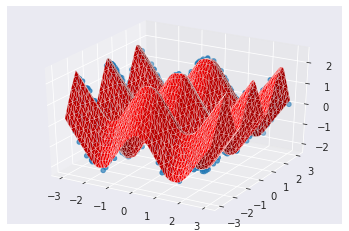

In [45]:
#Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3, 3, 50)  #equally spaced 50 numbers between -3 and 3
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1],Yhat, linewidth=0.2, color='red')
plt.show()

We can see that the NN manages to apporximate this function quite well.

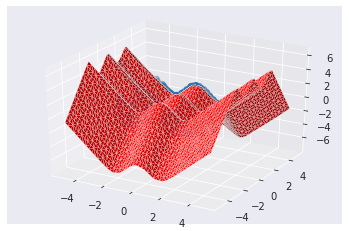

In [46]:
#an my NN extrapolated?

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#what if we change the interval because it predicted well for -3 to 3
line = np.linspace(-5, 5, 50)  #equally spaced 50 numbers between -3 and 3
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1],Yhat, linewidth=0.2, color='red')
plt.show()

**Observation:** 
+ It doesn't work quite well at all for higher intervals tham [-3, 3]. It assumes that the pattern keeps going in the direction it was going at the edges. And ofcourse, this is because the NN doesnt use a periodic activation function. Therefore, we dont expect it to be periodic wrt the inputs.
